# Обучение без учителя

### Задание 1 

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
boston = load_boston()

In [5]:
# Создание датафрейма X с признаками
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Создание датафрейма y с целевой переменной
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
# Разбиение данных на тренировочный и тестовый датасеты
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Стандартизация признаков
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
# Построение модели t-SNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(X_train_scaled.shape)
print(X_train_tsne.shape)

(404, 13)
(404, 2)


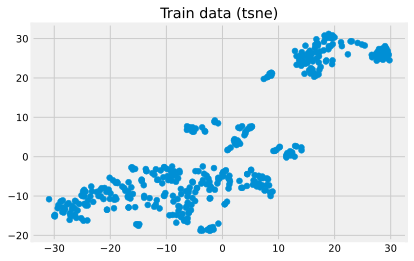

In [10]:
# Построение диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Train data (tsne)')
plt.show()

### Задание 2 

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [11]:
from sklearn.cluster import KMeans

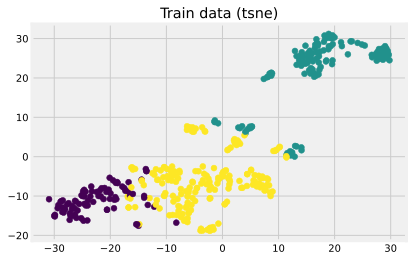

In [12]:
# Создание модели
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

# Вычисление
labels_train = kmeans.fit_predict(X_train_scaled)

# Построение диаграммы рассеяния
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.title('Train data (tsne)')
plt.show()

In [13]:
# Средние значение по кластерам на тренировочных данных
print('Кластер 0: price_m = {}, CRIM_m = {}'.format(y_train.loc[labels_train == 0, 'price'].mean(), X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: price_m = {}, CRIM_m = {}'.format(y_train.loc[labels_train == 1, 'price'].mean(), X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: price_m = {}, CRIM_m = {}'.format(y_train.loc[labels_train == 2, 'price'].mean(), X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: price_m = 27.78837209302326, CRIM_m = 0.07356558139534884
Кластер 1: price_m = 16.165354330708663, CRIM_m = 10.797028425196851
Кластер 2: price_m = 24.958115183246072, CRIM_m = 0.4216602094240837


Видно, что в Кластере 0 самая высокая цена и наименьший показатель CRIM, дальше идет Кластер 2. В Кластере 1 самая низкая цена и высокий показатель CRIM.

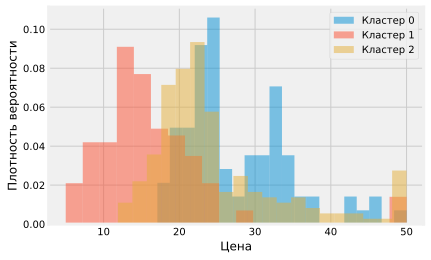

In [14]:
# Посмотрим гистограммы
plt.hist(y_train.loc[labels_train == 0, 'price'], bins=20, density=True, alpha=0.5, label='Кластер 0')
plt.hist(y_train.loc[labels_train == 1, 'price'], bins=20, density=True, alpha=0.5, label='Кластер 1')
plt.hist(y_train.loc[labels_train == 2, 'price'], bins=20, density=True, alpha=0.5, label='Кластер 2')

plt.legend()
plt.xlabel('Цена')
plt.ylabel('Плотность вероятности')
plt.show()

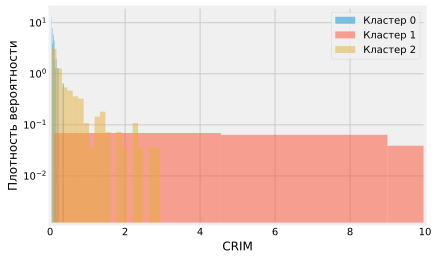

In [15]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 0')
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 1')
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 2')

plt.legend()
plt.xlabel('CRIM')
plt.ylabel('Плотность вероятности')

plt.xlim(0, 10)
plt.yscale(value='log')

plt.show()

Гистограммы также отражают полученную закономерность.

### Задание 3 

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [16]:
# Применение модели для тестовых данных
labels_test = kmeans.predict(X_test_scaled)

# Полученные метки
labels_test

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [17]:
# Средние значение по кластерам на тестовых данных
print('Кластер 0: price_m = {}, CRIM_m = {}'.format(y_test.loc[labels_test == 0, 'price'].mean(), X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: price_m = {}, CRIM_m = {}'.format(y_test.loc[labels_test == 1, 'price'].mean(), X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: price_m = {}, CRIM_m = {}'.format(y_test.loc[labels_test == 2, 'price'].mean(), X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: price_m = 31.35, CRIM_m = 0.06206
Кластер 1: price_m = 16.43714285714286, CRIM_m = 10.165531142857143
Кластер 2: price_m = 21.860784313725492, CRIM_m = 0.2660788235294118


Здесь такая же закономерность, как и для тренировочных данных.

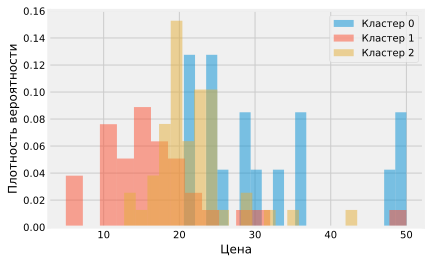

In [18]:
# Посмотрим гистограммы
plt.hist(y_test.loc[labels_test == 0, 'price'], bins=20, density=True, alpha=0.5, label='Кластер 0')
plt.hist(y_test.loc[labels_test == 1, 'price'], bins=20, density=True, alpha=0.5, label='Кластер 1')
plt.hist(y_test.loc[labels_test == 2, 'price'], bins=20, density=True, alpha=0.5, label='Кластер 2')

plt.legend()
plt.xlabel('Цена')
plt.ylabel('Плотность вероятности')
plt.show()

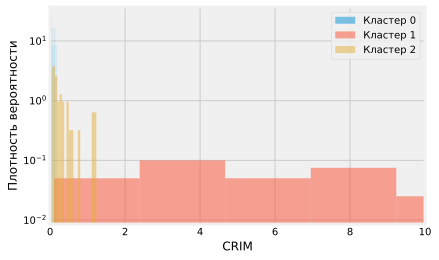

In [19]:
plt.hist(X_test.loc[labels_test == 0, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 0')
plt.hist(X_test.loc[labels_test == 1, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 1')
plt.hist(X_test.loc[labels_test == 2, 'CRIM'], bins=20, density=True, alpha=0.5, label='Кластер 2')

plt.legend()
plt.xlabel('CRIM')
plt.ylabel('Плотность вероятности')

plt.xlim(0, 10)
plt.yscale(value='log')

plt.show()